In [2]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

In [15]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

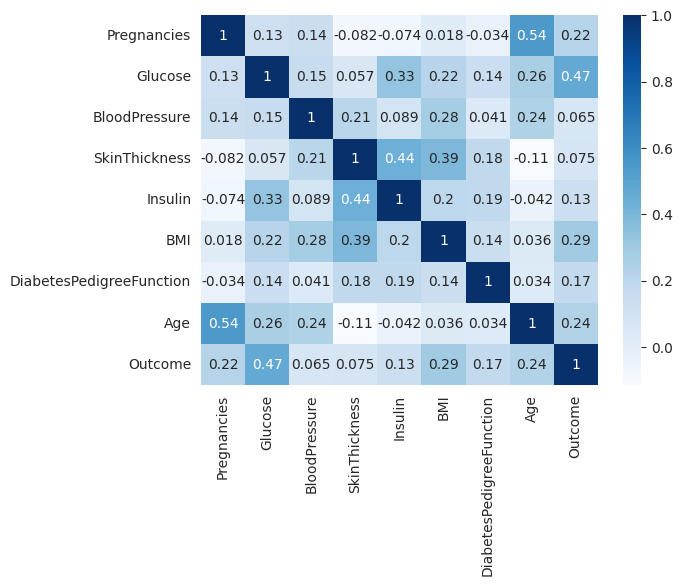

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

cor = df.corr()

sns.heatmap(cor, cmap='Blues', annot=True)
plt.show()

In [16]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [17]:
X = df[["Glucose", "BMI", 'Age', "Pregnancies"]]
X.head()

,Glucose,BMI,Age,Pregnancies
0,148,33.6,50,6
1,85,26.6,31,1
2,183,23.3,32,8
3,89,28.1,21,1
4,137,43.1,33,0


In [18]:
y = df.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
X_train

,Glucose,BMI,Age,Pregnancies
158,88,29.0,22,2
573,98,34.7,22,2
429,95,35.0,43,1
740,120,42.3,48,11
589,73,21.1,25,0
...,...,...,...,...
407,101,21.9,25,0
601,96,23.7,28,6
243,119,27.1,33,6
321,112,31.6,25,3


In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn.predict(X_test)

In [22]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred)

0.5072463768115942

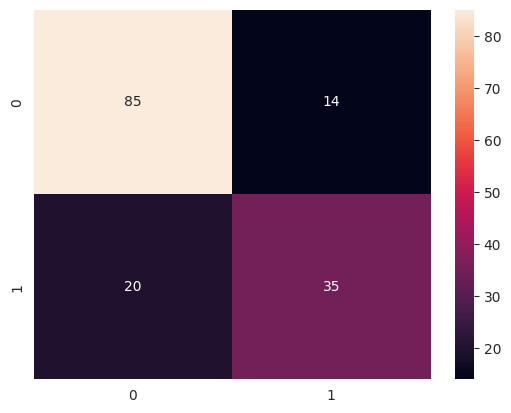

In [23]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        99
           1       0.71      0.64      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [26]:
print(knn_gscv.cv_results_['rank_test_score'])

[24 22 23 21 18 19 20 14 12 15  5  4 11  7 10 13 17  1  3  2 16  9  8  6]


In [27]:
knn_gscv.best_params_

{'n_neighbors': 18}

In [40]:
knn = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors']).fit(X_train, y_train)

In [41]:
y_pred = knn.predict(X_test)

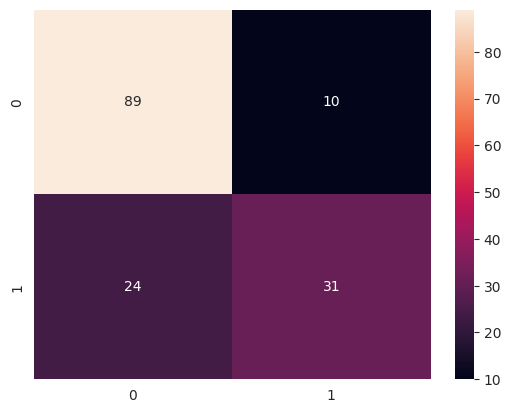

In [42]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [43]:
jaccard_score(y_test, y_pred)

0.47692307692307695